In [4]:
import numpy as np
import pandas as pd

## Question 1: Import and load the dataset

In [88]:
data = pd.read_csv("bank.csv")

## Question 2a: Features of the dataset 

In [89]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Question 2b: Convert datatypes

In [81]:
def convert(dataframe, conversion_dict):
    for column, dtype in conversion_dict.items():
        dataframe[column] = dataframe[column].astype(dtype)
        

In [90]:
conversion_dict = {
    'job': 'category',
    'marital':'category',
    'education':'category',
    'contact':'category',
    'month':'category',
    'poutcome':'category',
}

In [91]:
convert(data, conversion_dict)

In [92]:
data.dtypes

age             int64
job          category
marital      category
education    category
default        object
balance         int64
housing        object
loan           object
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object

## Question 2c: Removing missing/ null values

#### Check for null values

In [60]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Count before removing null

In [93]:
data.shape

(4521, 17)

#### Remove the null values

In [94]:
data = data.dropna()

In [95]:
data.shape

(4521, 17)

## Question 2d: Removing duplicates

#### Total number of records in the given data

In [96]:
data.shape

(4521, 17)

#### Removing NaN values from the dataset

In [97]:
data=data.dropna()

#### Number of records after removing NaN values

In [98]:
data.shape

(4521, 17)

#### Removing the duplicate values

In [99]:
df=df.drop_duplicates(keep='first')

#### Number of records after removing duplicate values

In [100]:
data.shape

(4521, 17)

In [101]:
data.to_csv('cleaned_data.csv')

## Question 3: Find the average balance of the customer who belongs to the subscribed customer and non-subscribed customer and also use a related plot to show them in visualization.

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_csv('cleaned_data.csv')

#### Creating new dataframe for subscribed and non subscribed customers

In [134]:
subscribed_df = df[df['y']=='yes']
non_subscribed_df = df[df['y']=='no']

#### Calcualting the average balance for the subscribed and non subscribed customers

In [135]:
subscribed_mean_balance = subscribed_df['balance'].mean()
non_subscribed_mean_balance = non_subscribed_df['balance'].mean()

#### Creating a bar plot for the subscribed and non subscribed customers

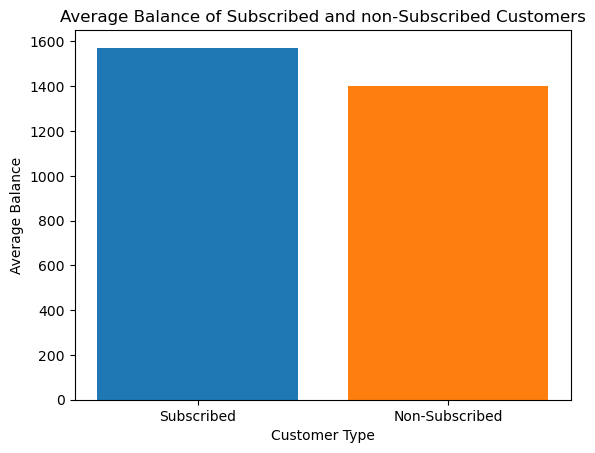

In [136]:
plt.bar('Subscribed',subscribed_mean_balance,label='Subscribed')
plt.bar('Non-Subscribed',non_subscribed_mean_balance,label='Non-Subscribed')

plt.xlabel('Customer Type')
plt.ylabel('Average Balance')
plt.title('Average Balance of Subscribed and non-Subscribed Customers')
plt.show()

## Question 4: Use a pie plot to find the distribution(frequency) of the education. Make sure to add labels and show the percentage of each education distribution.

#### Get the education distribution

In [137]:
distribution_education = df['education'].value_counts()
distribution_education.to_frame()

,education
secondary,2306
tertiary,1350
primary,678
unknown,187


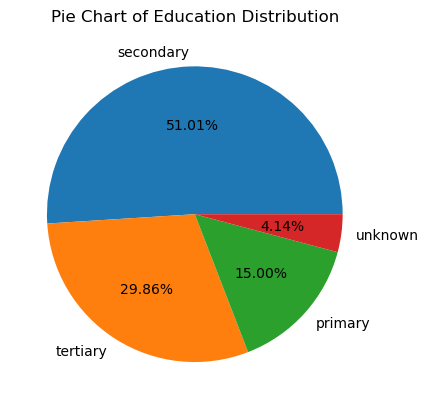

In [138]:
plt.pie(distribution_education,labels=['secondary','tertiary','primary','unknown'],autopct ='%1.2f%%')
plt.title('Pie Chart of Education Distribution')
plt.show()

## Question 5: Create a function that should be able to create a new feature(Variable) called season using the month column.

In [139]:
#This function takes a Pandas dataframe as input and returns a new Pandas dataframe with a new column called season.
#The season column is created by mapping the month column to a dictionary that maps months to seasons.

def create_season_feature(df):
    # Get the unique months in the dataset
    months = df['month'].unique()
    
    # Create a dictionary to map months to seasons
    season_map = {
        'jan': 'winter',
        'feb': 'winter',
        'mar': 'spring',
        'apr': 'spring',
        'may': 'spring',
        'jun': 'summer',
        'jul': 'summer',
        'aug': 'summer',
        'sep': 'autumn',
        'oct': 'autumn',
        'nov': 'autumn',
        'dec': 'winter',
    }
    
    # Create the 'season' column
    df['season'] = df['month'].map(season_map)
    
    return df

In [140]:
df = create_season_feature(df)
print(df)

#The season column now contains the season for each month. For example, the month jan is mapped to the season winter.
#Then, it will create the season feature using the month column.


      Unnamed: 0  age            job  marital  education default  balance  \
0              0   30     unemployed  married    primary      no     1787   
1              1   33       services  married  secondary      no     4789   
2              2   35     management   single   tertiary      no     1350   
3              3   30     management  married   tertiary      no     1476   
4              4   59    blue-collar  married  secondary      no        0   
...          ...  ...            ...      ...        ...     ...      ...   
4516        4516   33       services  married  secondary      no     -333   
4517        4517   57  self-employed  married   tertiary     yes    -3313   
4518        4518   57     technician  married  secondary      no      295   
4519        4519   28    blue-collar  married  secondary      no     1137   
4520        4520   44   entrepreneur   single   tertiary      no     1136   

     housing loan   contact  day month  duration  campaign  pdays  previous

## Question 6: Use the count plot with a variable that you created in the above question and also the Y variable to find the class distribution.

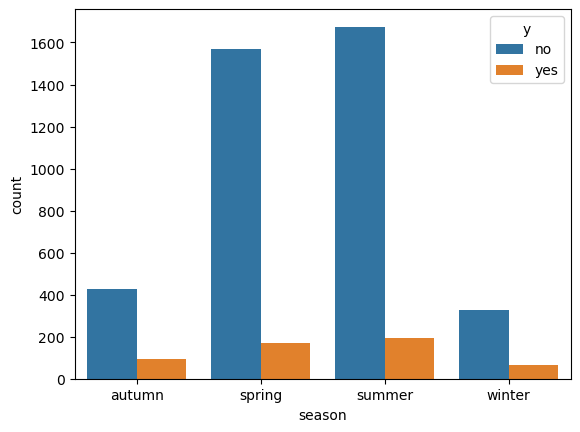

In [142]:
sns.countplot(x='season', hue='y', data=df)
plt.show()

#Now the code will create a count plot of the season variable and the y variable. The y variable is the target variable that indicates whether or not the customer subscribed to the term deposit.
#The output of the code is a count plot that shows the number of customers in each season who subscribed to the term deposit and the number of customers in each season who did not subscribe to the term deposit.
#The count plot shows that the number of customers who subscribed to the term deposit is higher in the spring and summer seasons than in the winter and autumn seasons. This suggests that there may be a relationship between season and subscription.


## Question 7: Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot.

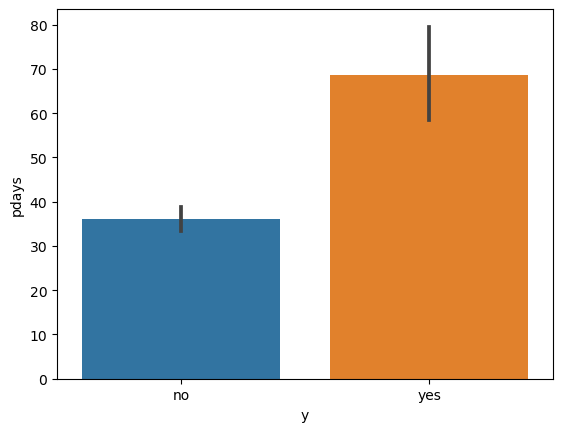

In [143]:
sns.barplot(y='pdays', x='y', data=df)
plt.show()

#The code  will create a bar plot of the pdays variable and the y variable. The y variable is the target variable that indicates whether or not the customer subscribed to the term deposit.
#The output of the code is a bar plot that shows the number of customers who subscribed to the term deposit for different values of the pdays variable.
#The bar plot shows that the number of customers who subscribed to the term deposit is higher for customers with lower values of the pdays variable. This suggests that there may be a relationship between pdays and subscription, where customers who were contacted more recently are more likely to subscribe.


## Question 8: Replace the -1 as nan values for the P-days store.

In [144]:
df['pdays'].replace(-1, np.NAN, inplace=True)

print(df['pdays'].head())

#This code will replace all -1 values in the pdays column with NaN values.
#The output of the code is the first 5 rows of the pdays column. The -1 values have been replaced with NaN values.


0      NaN
1    339.0
2    330.0
3      NaN
4      NaN
Name: pdays, dtype: float64


## Question 9: Once you are done with question number 8, do the same analysis as question number 7. And observe the difference between question number 7 and question number 9.

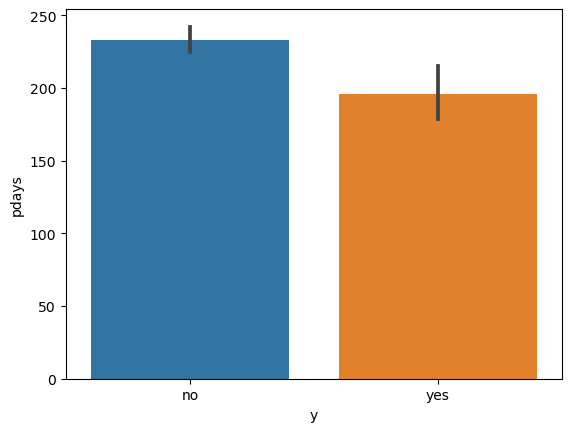

In [145]:
#The bar plots of Q9 and Q7 shows that the number of customers who subscribed to the term deposit is higher for customers with lower values of the pdays variable.
#This suggests that there may be a relationship between pdays and subscription, where customers who were contacted more recently are more likely to subscribe.

sns.barplot(y='pdays', x='y', data=df)
plt.show()

## Question 10: Does the customer take the term subscription who has less than 0 balance?
Hint: Use any kind of plot which would you the related information to this question.


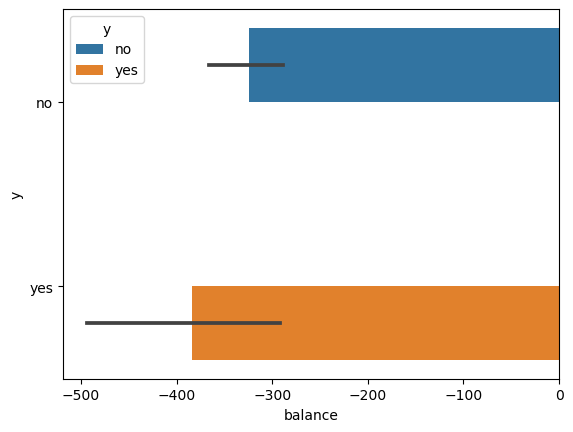

In [146]:
# Filtering for customers with negative balance
df_filtered = df[df['balance']<0]

sns.barplot(x='balance',y='y', hue='y', data= df_filtered)
plt.show()


#The code will filter the dataframe for customers with negative balance. Next, it will create a bar plot of the balance variable and the y variable. The y variable is the target variable that indicates whether or not the customer subscribed to the term deposit.
#The output of the code is a bar plot that shows the number of customers who subscribed to the term deposit for different values of the balance variable.
#The bar plot shows that there are very few customers with negative balance who subscribed to the term deposit. This suggests that customers with negative balance are less likely to subscribe to the term deposit.


## Question 11: Use Pivot table to find the maximum balance for each type of job.

In [147]:
#Creating a pivot table of the balance variable by job
pivot_table = df.pivot_table(values='balance', index = 'job', aggfunc=max)

#printing the pivot table
print(pivot_table)

               balance
job                   
admin.           22171
blue-collar      16353
entrepreneur     42045
housemaid        26965
management       27359
retired          71188
self-employed    16430
services         26394
student          11555
technician       27733
unemployed        9019
unknown           7337


## Question 12: Use the Age, balance, and Y column to plot the scatter plot and find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.

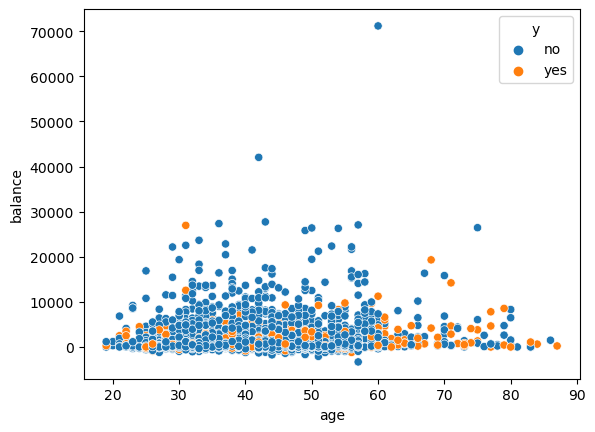

In [148]:
#Creating a scatter plot of the age and balance variables

sns.scatterplot(x='age', y='balance', hue='y', data=df)
plt.show()


#The scatter plot shows that there is a positive correlation between age and balance, meaning that customers with higher ages tend to have higher balances.
#However, there is also a lot of variation in the data, and there are some customers with high ages and low balances, and vice versa.
#The scatter plot also shows that the points for customers who subscribed to the term deposit (Yes) are more concentrated in the lower-right corner of the plot.
#which suggests that customers with higher ages and higher balances are more likely to subscribe to the term deposit.


## Question 13: Use the violin plot and also the box plot to find the distribution of the balance for each class of the Y column. And try to tell why we have a Violin plot and Box plot both rather than one.

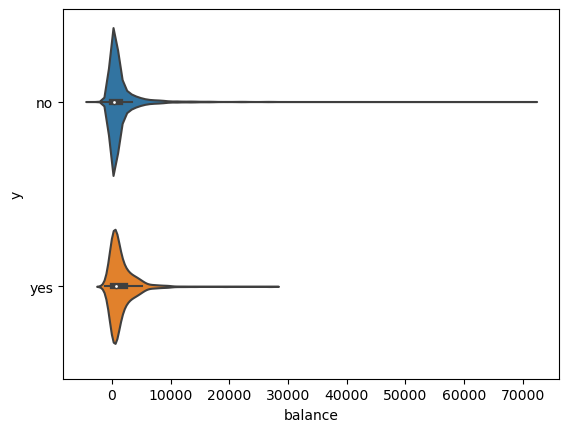

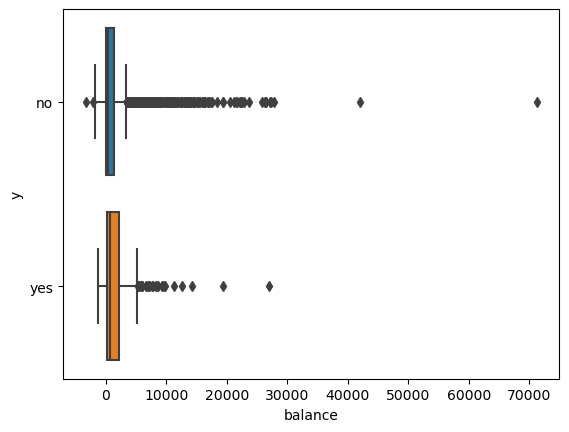

In [150]:
#Creating a violin plot of balance variable by y
sns.violinplot(y='y', x='balance', data=df)
plt.show()

#Creating a box plot of the balance variable by y
sns.boxplot(y='y',x='balance',data=df)
plt.show()


#The output of the code is two plots, one violin plot and one box plot.
#The violin plot shows the distribution of the balance for each class of the y variable.
#The box plot shows the distribution of the balance for each class of the y variable, along with the median, quartiles, and outliers.
#The violin plot shows that the distribution of the balance is different for each class of the y variable. 
#The distribution for customers who subscribed to the term deposit (Yes) is wider than the distribution for customers who did not subscribe to the term deposit (No).
#This suggests that there is more variation in the balance for customers who subscribed to the term deposit.
#The box plot also shows that the median balance is higher for customers who subscribed to the term deposit (Yes) than for customers who did not subscribe to the term deposit (No).
#This suggests that customers who subscribed to the term deposit tend to have higher balances.
#We use a violin plot and a box plot both rather than one because they show different aspects of the distribution of the data.
#The violin plot shows the shape of the distribution, while the box plot shows the median, quartiles, and outliers.


## Question 14: Use a pie plot to know the Proportion(distribution) of the defaulters and non-defaulters.
Note: Try to explore more parameters that are there in the pie-plot method.


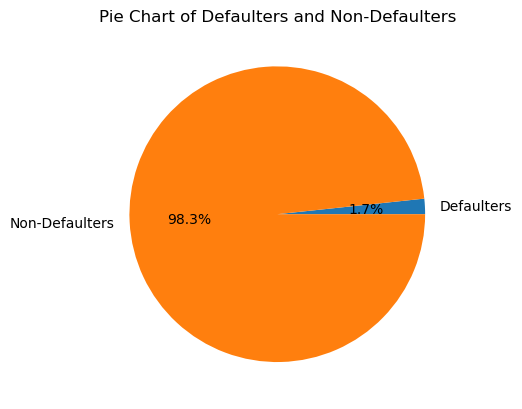

In [159]:
#Get the defaulters and non-defaulters
defaulters = df[df['default'] == 'yes']
non_defaulters = df[df['default'] == 'no']

#Get the number of defaulters and non-defaulters
number_of_defaulters = len(defaulters)
number_of_non_defaulters = len(non_defaulters)

#Get pie chart slice lables
pie_chart_slice_labels = ['Defaulters', 'Non-Defaulters']

#Get pie chart slice values
pie_chart_slice_values = [number_of_defaulters, number_of_non_defaulters]

#Create a pie chart of the defaulters and non-defaulters
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Defaulters and Non-Defaulters")
plt.show()

## Question 15: Use Box plot and strip plot to know the distribution of the Pdays with respect to Y classes and differentiate both plots.

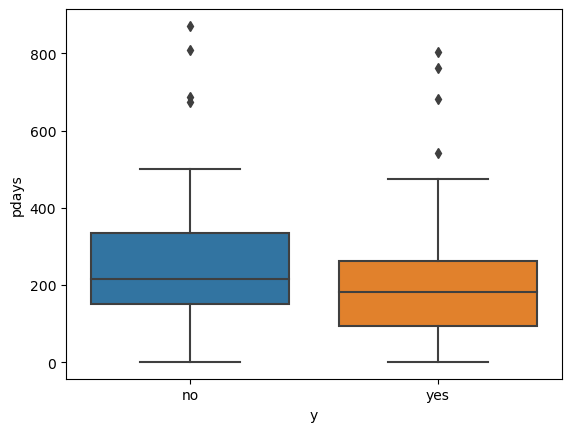

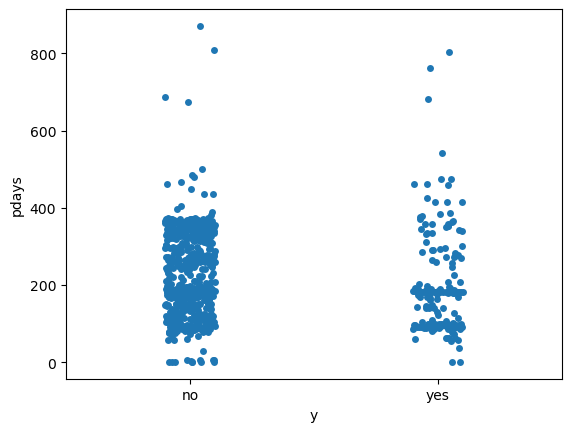

In [161]:
#Create a box plot of the pdays cariable by y
sns.boxplot(x='y',y='pdays',data=df)
plt.show()

#Create a strip plot of the pdays variable by y
sns.stripplot(x='y', y='pdays', data=df)
plt.show()


#The box plot shows that the median pdays is lower for customers who subscribed to the term deposit (Yes) than for customers who did not subscribe to the term deposit (No). This suggests that customers who subscribed to the term deposit were contacted more recently than customers who did not subscribe to the term deposit.
#The strip plot shows that there is more variation in the pdays for customers who did not subscribe to the term deposit (No).
#This suggests that there is a wider range of days since the customer was last contacted for customers who did not subscribe to the term deposit.
#The main difference between a box plot and a strip plot is that the box plot shows the distribution of the data, while the strip plot shows the individual data points.
#The strip plot can be useful for identifying outliers, which are data points that are far outside the normal distribution of the data.
